# <center> IEOR 169 Final Project: Data Generation and Exploration </center>
# <center> Team: Chris Landgrebe, Calvin Suster, Wyatt Walsh </center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Necessary-Libraries-and-Setting-Options" data-toc-modified-id="Importing-Necessary-Libraries-and-Setting-Options-1">Importing Necessary Libraries and Setting Options</a></span></li><li><span><a href="#Exploration-of-Results-and-Visualization" data-toc-modified-id="Exploration-of-Results-and-Visualization-2">Exploration of Results and Visualization</a></span><ul class="toc-item"><li><span><a href="#Part-1:-p-Envy-Free-Allocations" data-toc-modified-id="Part-1:-p-Envy-Free-Allocations-2.1">Part 1: p-Envy-Free Allocations</a></span></li><li><span><a href="#Part-2:-p-Envy-Free-Up-To-One-Item" data-toc-modified-id="Part-2:-p-Envy-Free-Up-To-One-Item-2.2">Part 2: p-Envy-Free Up To One Item</a></span></li></ul></li></ul></div>

## Importing Necessary Libraries and Setting Options

In [230]:
# import libraries and functions
import imgkit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display

# configure Jupyter Notebook
%matplotlib inline

# style Jupyter Notebook output
display(
    HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

## Exploration of Results and Visualization
In this section, our result data from the different solver instances is loaded and then analysis is performed through visualization. Each part includes:
- a summary of the solver outcomes for all of the datasets in table form
- full outcomes of the solver for the different combinations of people and items
    - This includes a built-in heatmap for the associated p-Envy-Free value, solver time expended, number of people and number of items
    
In addition, comparison is conducted of the results from part 1 and part 4. This includes:
- a tabular comparison
- an interactive widget containing an annotated barchart of solver times for different people, items combinations

To enable this analysis, functions and necessary parameters are created below.

In [225]:
solve_result_mapping = {
    'optimal solution found': 99,
    'optimal solution indicated, but error likely': 199,
    'constraints cannot be satisfied': 299,
    'objective can be improved without limit': 399,
    'stopped by a limit (such as on iterations)': 499,
    'stopped due to solver error': 599
}
columns = ['Solver Status', 'Allocation p-Envy-Free Value', 'Solver Elapsed Time',
           'Solver Total Elaspsed Time', 'Number of People', 'Number of Items',
           'Associated File Number']
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')]),{'props':[("font-family", "Calibri")]}, {'selector': 'th',
                                                   'props': [('text-align','center')]}]
cm = sns.light_palette("#003262", as_cmap=True)

In [234]:
def tabular_statistics(rel_path_to_results, grouped_title, overall_title, columns = columns, save=False):
    results = pd.read_csv(rel_path_to_results, sep= ',')
    results['solveResult'] = pd.cut(results['solveResult'], 
                                  bins = [0] + list(solve_result_mapping.values()),
                                  labels = list(solve_result_mapping.keys()))
    results.columns = columns
    results = results.style.background_gradient(cmap=cm, subset = ['Allocation p-Envy-Free Value', 
                                'Solver Elapsed Time','Number of People', 'Number of Items'])
    results = results.set_caption(overall_title).set_table_styles(styles).hide_index()
    grouped = results.data.groupby('Solver Status').count()
    grouped = grouped.reset_index().iloc[:,:2].rename(columns = {'Allocation p-Envy-Free Value':'Counts'})
    grouped = grouped.style.set_caption(grouped_title).set_table_styles(styles).hide_index()
    if save:
        html = grouped.render()
        imgkit.from_string(html, '../visualizations/q1_summary.png')
        html = results.render()
        imgkit.from_string(html, '../visualizations/q1_results.png')
    display(grouped)
    display(results)

NameError: name 'crashes' is not defined

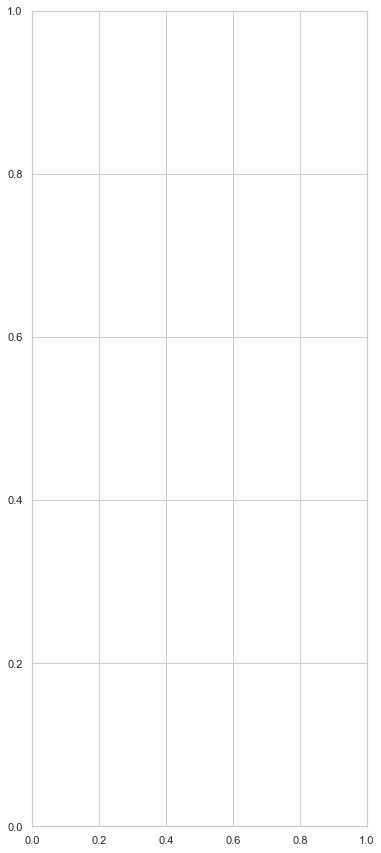

In [235]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

### Part 1: p-Envy-Free Allocations


In [236]:
tabular_statistics('../data/output/q1/results.txt',
                   'Summary of Results of MIP for Part 1',
                   'Results of MIP for Part 1')

Solver Status,Counts
optimal solution found,308
"optimal solution indicated, but error likely",16
constraints cannot be satisfied,0
objective can be improved without limit,0
stopped by a limit (such as on iterations),76
stopped due to solver error,0


### Part 2: p-Envy-Free Up To One Item

In [223]:
tabular_statistics('../data/output/q2/results.txt',
                   'Summary of Results of MIP for Part 2',
                   'Results of MIP for Part 2')

Solver Status,Counts
optimal solution found,400
"optimal solution indicated, but error likely",0
constraints cannot be satisfied,0
objective can be improved without limit,0
stopped by a limit (such as on iterations),0
stopped due to solver error,0
